# INDIA AIR QUALITY DATA ANALYSIS, VISUALISATION AND PREDICTION



<h2>Aim</h2>
<p>To do data analysis on India Air Quality data and predict tha value of Air Quality Index based on given features of concentration of sulphur dioxide,nitrogen dioxide, respirable suspended particualte matter, suspended particulate matter and classify the Air Quality as good, moderate, poor, unhealthy, healthy.</p>
<p>The data is combined(across the years and states) and largely clean version of the Historical Daily Ambient Air Quality Data released by the Ministry of Environment and Forests and Central Pollution Control Board of India under the National Data Sharing and Accessibility Policy (NDSAP)
year 1990-2015</p>
<h4><p>The columns are</h4>
<li>stn_code (station code)</li>
<li>sampling_date (date of sample collection)</li>
<li>state (Indian State)</li>
<li>location (location of sample collection)</li>
<li>agency</li>
<li>type (type of area)</li>
<li>so2 (sulphur dioxide concentration)</li>
<li>no2 (nitrogen dioxide concentration)</li>
<li>rspm (respirable suspended particualte matter concentration)</li>
<li>spm (suspended particulate matter)</li>
<li>location_monitoring_station</li>
<li>pm2_5 (particulate matter 2.5)</li>	
<li>date</li>
</p>




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('drive/My Drive/data.csv',encoding = "ISO-8859-1") #import data 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head(10) #print first 10 rows

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [5]:
data.tail(10) #printing last 10 rows

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,09-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-09
435733,SAMP,12-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-12
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns #print the columns/features of the data

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [7]:
data.describe() #basic info of the dataset

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


# DATA SHAPE (DIMENSION)

In [8]:
data.shape #dimensions of the data

(435742, 13)

# Visualization for states with highest pollutants


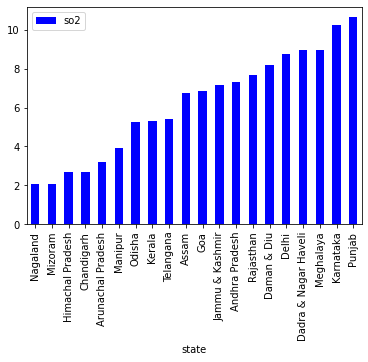

In [9]:
data[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').head(20).plot.bar(color='b')
plt.show() 

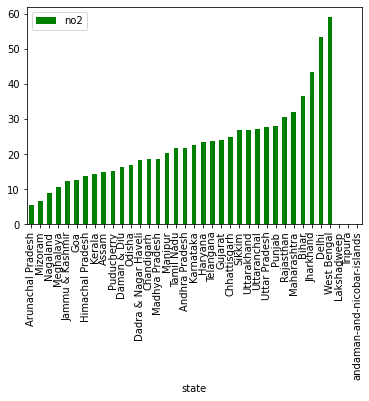

In [10]:
data[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='g')
plt.show()

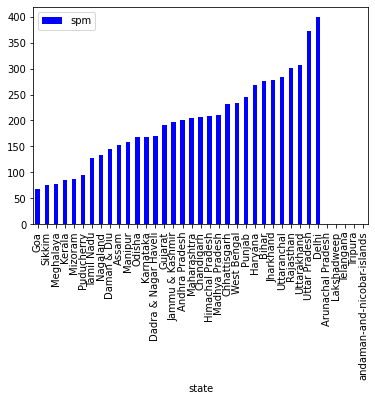

In [11]:
data[['spm','state']].groupby(["state"]).mean().sort_values(by='spm').plot.bar(color='b')
plt.show()

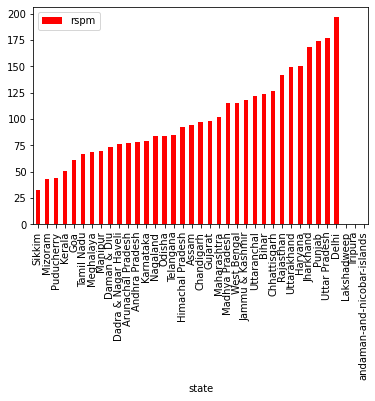

In [12]:
data[['rspm','state']].groupby(["state"]).mean().sort_values(by='rspm').plot.bar(color='r')
plt.show()

# NULL VALUES COUNT

In [13]:
data.isna().sum() #print the sum of null values for each columns

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

# DROP UNNECESSARY COLUMN

In [14]:
data.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True) 

In [15]:
data.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,Industrial Area,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,Industrial Area,4.0,8.9,NaN,NaN,NaN,1990-05-01


# CALCULATE TOTAL MISSING VALUES AND THEIR PERCENTAGE

In [16]:
total = data.isnull().sum().sort_values(ascending=False) 

In [17]:
total.head()

pm2_5    426428
spm      237387
rspm      40222
so2       34646
no2       16233
dtype: int64

Calculate the percent of null values for each columns (sum of null values / total non-null value) *100

In [18]:
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)  #count(returns Non-NAN value)

In [19]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [20]:
missing_data.head()

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
rspm,40222,9.230692
so2,34646,7.951035
no2,16233,3.725370


# PERCENT OF MISSING VALUE (BAR PLOT)

Text(0.5, 1.0, 'Percent missing data by feature')

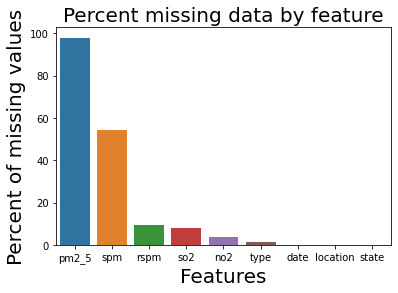

In [21]:
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)

# MEAN DISTRIBUTION BY STATE

In [22]:
data.groupby('state')[['spm','pm2_5','rspm','so2','no2']].mean()

,spm,pm2_5,rspm,so2,no2
state,,,,,
Andhra Pradesh,200.260378,NaN,78.182824,7.284845,21.704451
Arunachal Pradesh,NaN,NaN,76.629213,3.179104,5.469697
Assam,153.355386,NaN,93.724912,6.723263,14.793691
Bihar,276.917416,NaN,123.705176,19.381476,36.575525
Chandigarh,206.056150,NaN,96.587079,2.676986,18.619404
Chhattisgarh,231.290969,NaN,126.472399,12.846609,24.815961
Dadra & Nagar Haveli,170.545024,30.511628,76.536530,8.939587,18.293959
Daman & Diu,145.681416,27.886364,73.749431,8.192958,16.168926
Delhi,399.402088,95.113208,196.639771,8.737273,53.489147


# FILL MISSING VALUES BY MEAN (GROUP BY STATE)

In [23]:
grp_state = data.groupby('state')

In [24]:
def impute_mean_by_state(series):
    return series.fillna(series.mean()) 

In [25]:
data['rspm']=grp_state['rspm'].transform(impute_mean_by_state)  #fill value with mean value group by state
data['so2']=grp_state['so2'].transform(impute_mean_by_state)
data['no2']=grp_state['no2'].transform(impute_mean_by_state)
data['spm']=grp_state['spm'].transform(impute_mean_by_state)
data['pm2_5']=grp_state['pm2_5'].transform(impute_mean_by_state)

In [26]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,435739.000000,435739.000000,435739.000000,431671.000000,123689.000000
mean,10.589141,25.663170,109.680907,215.198748,48.317274
std,10.863679,18.271145,72.519399,117.470157,21.455206
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,4.800000,14.000000,59.000000,142.000000,30.729696
50%,8.000000,21.800000,93.000000,205.255823,42.204089
75%,13.000000,32.000000,142.016832,248.000000,64.890625
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [27]:
data.isna().sum() #some null value remains since some state have one value(i.e NaN only) and no mean to replace them

state            0
location         3
type          5393
so2              3
no2              3
rspm             3
spm           4071
pm2_5       312053
date             7
dtype: int64

# Data Distribution after Replacing Null value with mean

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.35165e+05, 4.81000e+02, 6.40000e+01, 2.10000e+01, 6.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

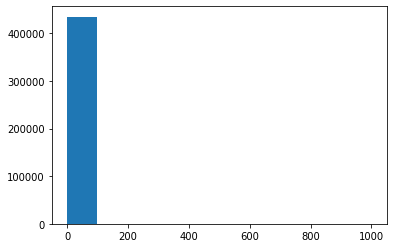

In [28]:
plt.hist(data.so2,range=(0,1000))

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.35644e+05, 9.40000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0.,  700., 1400., 2100., 2800., 3500., 4200., 4900., 5600.,
        6300., 7000.]),
 <a list of 10 Patch objects>)

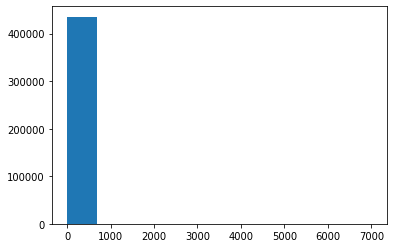

In [29]:
plt.hist(data.rspm,range=(0,7000))

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.32458e+05, 3.10400e+03, 1.32000e+02, 3.20000e+01, 7.00000e+00,
        3.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

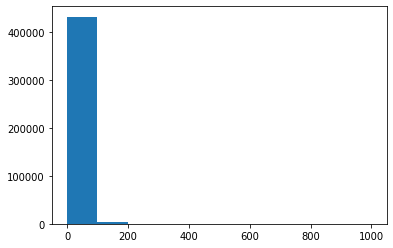

In [30]:
plt.hist(data.no2,range=(0.0,1000))

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.07548e+05, 2.30180e+04, 1.02600e+03, 6.10000e+01, 1.10000e+01,
        4.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00]),
 array([   0.,  400.,  800., 1200., 1600., 2000., 2400., 2800., 3200.,
        3600., 4000.]),
 <a list of 10 Patch objects>)

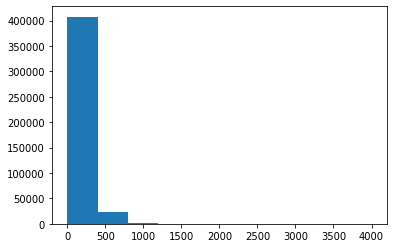

In [31]:
plt.hist(data.spm,range=(0.0,4000)) #spm

In [32]:
data.tail(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
435732,West Bengal,ULUBERIA,RIRUO,22.0,50.0,145.0,233.506524,64.890625,2015-12-09
435733,West Bengal,ULUBERIA,RIRUO,34.0,61.0,161.0,233.506524,64.890625,2015-12-12
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,233.506524,64.890625,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,233.506524,64.890625,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,233.506524,64.890625,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,233.506524,64.890625,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,233.506524,64.890625,2015-12-29
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA

The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used
\begin{equation*}
I = I_{low} +  \frac{I_{high}-I_{low}}{C_{high}-C_{low}}{(C-C_{low})}
\end{equation*}



In [33]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['SOi']=data['so2'].apply(cal_SOi)
df= data[['so2','SOi']]
df.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


# CALCULATE  AIR QUALITY INDEX FOR NO2 BASED ON FORMULA

In [34]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['Noi']=data['no2'].apply(cal_Noi)
df= data[['no2','Noi']]
df.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


# CALCULATE  AIR QUALITY INDEX FOR RSPM BASED ON FORMULA

In [35]:
def cal_RSPMi(rspm):
    rpi=0
    if(rspm<=100):
     rpi = rspm
    elif(rspm>=101 and rspm<=150):
     rpi= 101+(rspm-101)*((200-101)/(150-101))
    elif(rspm>=151 and rspm<=350):
     ni= 201+(rspm-151)*((300-201)/(350-151))
    elif(rspm>=351 and rspm<=420):
     ni= 301+(rspm-351)*((400-301)/(420-351))
    elif(rspm>420):
     ni= 401+(rspm-420)*((500-401)/(420-351))
    return rpi
data['RSPMi']=data['rspm'].apply(cal_RSPMi)
df= data[['rspm','RSPMi']]
df.head()

,rspm,RSPMi
0,78.182824,78.182824
1,78.182824,78.182824
2,78.182824,78.182824
3,78.182824,78.182824
4,78.182824,78.182824


In [36]:
df.tail()

,rspm,RSPMi
435737,143.0,185.857143
435738,171.0,0.000000
435739,NaN,0.000000
435740,NaN,0.000000
435741,NaN,0.000000


# CALCULATE  AIR QUALITY INDEX FOR SPM BASED ON FORMULA

In [37]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
data['SPMi']=data['spm'].apply(cal_SPMi)
df= data[['spm','SPMi']]
df.head()

,spm,SPMi
0,200.260378,166.840252
1,200.260378,166.840252
2,200.260378,166.840252
3,200.260378,166.840252
4,200.260378,166.840252


# CALCULATE  AIR QUALITY INDEX FOR PM 2.5 BASED ON FORMULA

In [38]:
def cal_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi
data['PMi']=data['pm2_5'].apply(cal_pmi)
df= data[['pm2_5','PMi']]
df.head()


,pm2_5,PMi
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [39]:
type(data['PMi'])

pandas.core.series.Series

Based on the measured ambient concentrations, corresponding standards and likely health impact, a sub-index is calculated for each of these pollutants. The worst sub-index reflects overall AQI.If multiple pollutants are measured at a monitoring site, then the largest or "dominant" AQI value is reported for the location

In [40]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi ):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi ):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['RSPMi'],x['SPMi']),axis=1)
df= data[['state','SOi','Noi','RSPMi','SPMi','AQI']]
df.head()


,state,SOi,Noi,RSPMi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,78.182824,166.840252,166.840252
1,Andhra Pradesh,3.875,8.750,78.182824,166.840252,166.840252
2,Andhra Pradesh,7.750,35.625,78.182824,166.840252,166.840252
3,Andhra Pradesh,7.875,18.375,78.182824,166.840252,166.840252
4,Andhra Pradesh,5.875,9.375,78.182824,166.840252,166.840252


In [41]:
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,1990-02-01,6.000,21.750,78.182824,166.840252,NaN,166.840252
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,1990-02-01,3.875,8.750,78.182824,166.840252,NaN,166.840252
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,1990-02-01,7.750,35.625,78.182824,166.840252,NaN,166.840252
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,1990-03-01,7.875,18.375,78.182824,166.840252,NaN,166.840252
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,1990-03-01,5.875,9.375,78.182824,166.840252,NaN,166.840252


# AQI RANGE for corresponding AQI value 

In [42]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

data['AQI_Range'] = data['AQI'] .apply(AQI_Range)
data.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,1990-02-01,6.000,21.750,78.182824,166.840252,NaN,166.840252,Poor
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,1990-02-01,3.875,8.750,78.182824,166.840252,NaN,166.840252,Poor
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,1990-02-01,7.750,35.625,78.182824,166.840252,NaN,166.840252,Poor
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,1990-03-01,7.875,18.375,78.182824,166.840252,NaN,166.840252,Poor
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,1990-03-01,5.875,9.375,78.182824,166.840252,NaN,166.840252,Poor


In [43]:
d=data #saving data in new value
d.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,1990-02-01,6.000,21.750,78.182824,166.840252,NaN,166.840252,Poor
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,1990-02-01,3.875,8.750,78.182824,166.840252,NaN,166.840252,Poor
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,1990-02-01,7.750,35.625,78.182824,166.840252,NaN,166.840252,Poor
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,1990-03-01,7.875,18.375,78.182824,166.840252,NaN,166.840252,Poor
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,1990-03-01,5.875,9.375,78.182824,166.840252,NaN,166.840252,Poor


Remove the rows with null values

In [44]:
data=data.dropna(subset=['spm']) #spm

In [45]:
data=data.dropna(subset=['pm2_5']) #spm

In [46]:
data.isna().sum() #all null values removed 

state           0
location        0
type         1925
so2             0
no2             0
rspm            0
spm             0
pm2_5           0
date            1
SOi             0
Noi             0
RSPMi           0
SPMi            0
PMi             0
AQI             0
AQI_Range       0
dtype: int64

# Linear Regression prediction

1. Using SOi, NOi, RSPMi, SPMi TO PREDICT AQI

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [48]:
X = data[['SOi','Noi','RSPMi','SPMi']]
y = data['AQI']
y.head()

64445    76.53653
64446    76.53653
64447    76.53653
64448    76.53653
64449    76.53653
Name: AQI, dtype: float64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [50]:
X_train.head()

,SOi,Noi,RSPMi,SPMi
360028,3.750,40.000,51.000000,117.819376
434684,2.500,46.250,87.000000,189.004349
64493,13.250,23.375,115.142857,210.000000
433906,5.000,55.000,115.142857,189.004349
183595,34.375,26.000,91.000000,106.000000


In [51]:
LR = LinearRegression() 
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print('Intercept',LR.intercept_)

Intercept 4.16884160826325


In [53]:
print('Coefficients',LR.coef_)

Coefficients [0.02669704 0.06811693 0.05053633 0.9544088 ]


In [54]:
predictions = LR.predict(X_test)

Text(0, 0.5, 'Predicted Y')

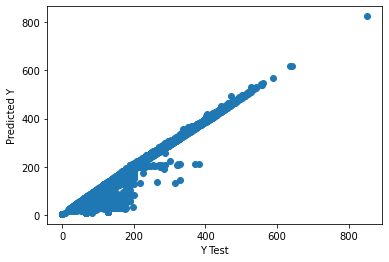

In [55]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [56]:
LR.score(X_test,y_test) 

0.9791014082309275

In [57]:
LR.predict([[4.8,21.75,78.18,100]]) 

array([105.17034145])

In [58]:
LR.predict([[5.2,7.625,76.53,75.0]])

array([80.27526359])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


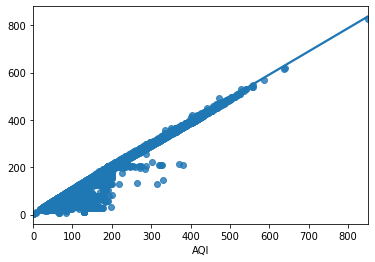

In [59]:
sns.regplot(y_test,predictions)

In [60]:
print('R^2_Square:%.2f '% r2_score(y_test, predictions))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, predictions)))

R^2_Square:0.98 
MSE:12.58 


# Linear Regression Model 2
Using so2, no2, rspm, spm

In [61]:
X1= data[['so2','no2','rspm','spm']]
y1 = data['AQI']
y.tail()

435734    195.959184
435735    189.004349
435736    189.004349
435737    189.004349
435738    189.004349
Name: AQI, dtype: float64

In [62]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.2,random_state=101)

In [63]:
X_train1.head()

,so2,no2,rspm,spm
360028,3.0,32.0,51.0,126.729064
434684,2.0,37.0,87.0,233.506524
64493,10.6,18.7,108.0,260.000000
433906,4.0,44.0,108.0,233.506524
183595,27.5,20.8,91.0,109.000000


In [64]:
LR1 = LinearRegression()
LR1.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
prediction1 = LR1.predict(X_test1)

Text(0, 0.5, 'Predicted Y')

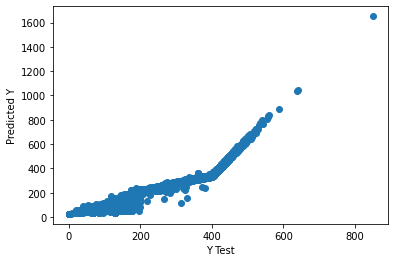

In [66]:
plt.scatter(y_test1,prediction1) #scatter plot for actual and predicted values
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [67]:
LR1.predict([[9.1,16.3,67,179]])

array([154.79655317])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


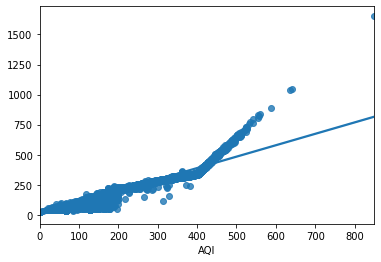

In [68]:
sns.regplot(y_test1,prediction1) #regression plot

In [69]:
y_test1_np= np.array(y_test1)
prediction1_np = np.array(prediction1)

In [70]:
LR1.score(X_test1,y_test1) #accuracy score 76.82%

0.9433954748037254

Mean Squared error, R^2 sqaured

In [71]:
print('R^2_Square:%.2f '% r2_score(y_test1, prediction1))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test1, prediction1)))

R^2_Square:0.94 
MSE:20.71 


# Classification of AQI

## Logistic Regression

1.Using SOi, Noi, RSPMi, SPMi
    

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
X2 = data[['SOi','Noi','RSPMi','SPMi']]
y2 = data['AQI_Range']

In [74]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [75]:
logmodel = LogisticRegression()
logmodel.fit(X_train2,y_train2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
predictions = logmodel.predict(X_test)

In [77]:
logmodel.score(X_test2,y_test2) #accuracy score 89.25 %

0.7013289457030756

Creating new csv file to store AQI range values inorder to cross verify predicted value

In [78]:
new = pd.DataFrame(d)
file1 = 'new1.csv'
new.to_csv(file1,index=True)

In [79]:
d.tail()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,233.506524,64.890625,2015-12-24,27.5,62.5,185.857143,189.004349,64.890625,189.004349,Poor
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,233.506524,64.890625,2015-12-29,25.0,57.5,0.000000,189.004349,64.890625,189.004349,Poor
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,Good
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,Good
435741,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,Good


In [80]:
logmodel.predict([[77.4,147.7,78.182,100]]) #correct

array(['Moderate'], dtype=object)

In [81]:
logmodel.predict([[32.7,35,78.182,203]]) #correct

array(['Poor'], dtype=object)

In [82]:
logmodel.predict([[100,182.2,78.182,400]]) #correct

array(['Poor'], dtype=object)

# Logistic regression model 2

2.Using so2,no2,rspm,spm

In [83]:
X3 = data[['so2','no2','rspm','spm']]
y3 = data['AQI_Range']

In [84]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=42)

In [85]:
logmodel2 = LogisticRegression()
logmodel2.fit(X_train3,y_train3)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
logmodel2.score(X_test3,y_test3) #very low accuracy score

0.6792304771547906

In [87]:
logmodel2.predict([[4.8,17.4,78.48,200]]) #correct

array(['Poor'], dtype=object)

In [88]:
logmodel2.predict([[67.4,127.7,78.48,215]]) #correct

array(['Poor'], dtype=object)

In [89]:
logmodel2.predict([[2.059,8.94,102,256]])  #wrong

array(['Hazardous'], dtype=object)

#  Using Random forest classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train3,y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
model.score(X_test3,y_test3) #high accuracy score of 99.97 %

0.9997974939881028

In [93]:
X_train3.head()

,so2,no2,rspm,spm
360294,4.000000,24.0,23.000000,126.729064
278096,5.800000,11.1,129.000000,262.000000
277941,2.900000,26.3,72.000000,140.000000
269637,18.300000,28.6,83.619824,155.000000
272765,5.275874,12.7,80.000000,176.000000


In [94]:
model.predict([[2.059,8.94,102,256]]) #correct

array(['Unhealthy'], dtype=object)

# Using Decision Tree Classifier

In [95]:
from sklearn import tree

In [96]:
model2 = tree.DecisionTreeClassifier()

In [97]:
model2.fit(X_train3,y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
model2.score(X_test3,y_test3) #high accuracy score of 99.98%

0.9997215542336413

Some predictions

In [99]:
model2.predict([[9,31,51,205.25]]) # correct

array(['Poor'], dtype=object)

In [100]:
model2.predict([[2,5.8,17,36]]) # correct

array(['Good'], dtype=object)

In [101]:
model2.predict([[18.6,48.3,142,285]]) # correct

array(['Unhealthy'], dtype=object)

In [102]:
model2.predict([[6,11,109,84.41]]) # correct

array(['Poor'], dtype=object)

In [103]:
model2.predict([[10,16,156,372.66]]) # correct

array(['Very unhealthy'], dtype=object)

<h1>Conclusion</h1>
<p>
<li>AQI is highly correlated with all the independent variables(so2, no2, rspm, spm)</li>
<li>AQI has been increasing over the years.</li>
<h4>Best models for AQI range classification :</h4>
<ol>
<li>Random Forest Classifier</li>
<li>Decision Tree Classifier</li>
</ol>
</p>

